In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import pandas as pd
plt.rcParams['font.size']=25

In [4]:
df=pd.read_excel('saturation_data.xlsx')
#df2=pd.read_excel('production_data.xlsx')

In [5]:
# SWI
Sh=.85
nw=3.8;
ng=2.6;
Srw=0;
Srg=0;

Sw=np.linspace(0,1-Sh,100)

for i in Sw:
    Sg=1-Sh-Sw
    Sw_eff_swi=Sw/(Sw+Sg)
    Sg_eff_swi=Sg/(Sw+Sg)
    krw_swi=((Sw-Srw)/(1-Srw))**nw
    krg_swi=((Sh/(1-Sg))*((Sg-Srg)/(1-Srg))**nw)+((1-(Sh/(1-Sg)))*((Sg-Srg)/(1-Srg))**ng)

In [14]:
# SWI 2 - 65%
Sh=.65
nw=3.8;
ng=2.6;
Srw=0;
Srg=0;

Sw2=np.linspace(0,1-Sh,100)

for i in Sw2:
    Sg2=1-Sh-Sw2
    Sw_eff_swi2=Sw2/(Sw2+Sg2)
    Sg_eff_swi2=Sg2/(Sw2+Sg2)
    krw_swi2=((Sw2-Srw)/(1-Srw))**nw
    krg_swi2=((Sh/(1-Sg2))*((Sg2-Srg)/(1-Srg))**nw)+((1-(Sh/(1-Sg2)))*((Sg2-Srg)/(1-Srg))**ng)

In [34]:
# SWI 3 - 45%
Sh=.45
nw=3.8;
ng=2.6;
Srw=0;
Srg=0;

Sw3=np.linspace(0,1-Sh,100)

for i in Sw3:
    Sg3=1-Sh-Sw3
    Sw_eff_swi3=Sw3/(Sw3+Sg3)
    Sg_eff_swi3=Sg3/(Sw3+Sg3)
    krw_swi3=((Sw3-Srw)/(1-Srw))**nw
    krg_swi3=((Sh/(1-Sg3))*((Sg3-Srg)/(1-Srg))**nw)+((1-(Sh/(1-Sg3)))*((Sg3-Srg)/(1-Srg))**ng)

In [42]:
# SOLID MODEL (with hydrate)
Sh=0.85
nw=4;
ng=2;
Srw=0.1;
Srg=0;

Sw_GC=np.linspace(0,1,100)
Sg_GC=1-Sw_GC

Sw_solid=np.linspace(0,1-Sh,100)
Sg_solid=.15-Sw_solid

for i in Sw_GC:
    krw_gc=(((Sw_GC)/(1-Srw))**nw)*(1-Sh)**2
    krg_gc=(((Sg_GC-Srg)/(1-Srg))**ng)*(1-Sh)**2
    krw_pf=(((Sw_GC)/(1-Srw))**nw)*(1-Sh**2+((2*((1-Sh)**2))/(np.log(Sh))))
    krg_pf=(((Sg_GC-Srg)/(1-Srg))**ng)*(1-Sh**2+((2*((1-Sh)**2))/(np.log(Sh))))

In [43]:
# SOLID MODEL (with hydrate)
Sh=0.65
nw=4;
ng=2;
Srw=0.1;
Srg=0;

Sw_GC=np.linspace(0,1,100)
Sg_GC=1-Sw_GC

Sw_solid2=np.linspace(0,1-Sh,100)
Sg_solid2=.35-Sw_solid2

for i in Sw_GC:
    krw_gc2=(((Sw_GC)/(1))**nw)*(1-Sh)**2
    krg_gc2=(((Sg_GC-Srg)/(1))**ng)*(1-Sh)**2
    krw_pf2=(((Sw_GC)/(1))**nw)*(1-Sh**2+((2*((1-Sh)**2))/(np.log(Sh))))
    krg_pf2=(((Sg_GC-Srg)/(1))**ng)*(1-Sh**2+((2*((1-Sh)**2))/(np.log(Sh))))

In [44]:
# SOLID MODEL (with hydrate)
Sh=0.45
nw=4;
ng=2;
Srw=0.1;
Srg=0;

Sw_GC=np.linspace(0,1,100)
Sg_GC=1-Sw_GC

Sw_solid3=np.linspace(0,1-Sh,100)
Sg_solid3=.55-Sw_solid3

for i in Sw_GC:
    krw_gc3=(((Sw_GC)/(1))**nw)*(1-Sh)**2
    krg_gc3=(((Sg_GC)/(1))**ng)*(1-Sh)**2
    krw_pf3=(((Sw_GC)/(1))**nw)*(1-Sh**2+((2*((1-Sh)**2))/(np.log(Sh))))
    krg_pf3=(((Sg_GC)/(1))**ng)*(1-Sh**2+((2*((1-Sh)**2))/(np.log(Sh))))

Text(0, 0.5, 'Gas relative permeability, (k$_{rg}$)')

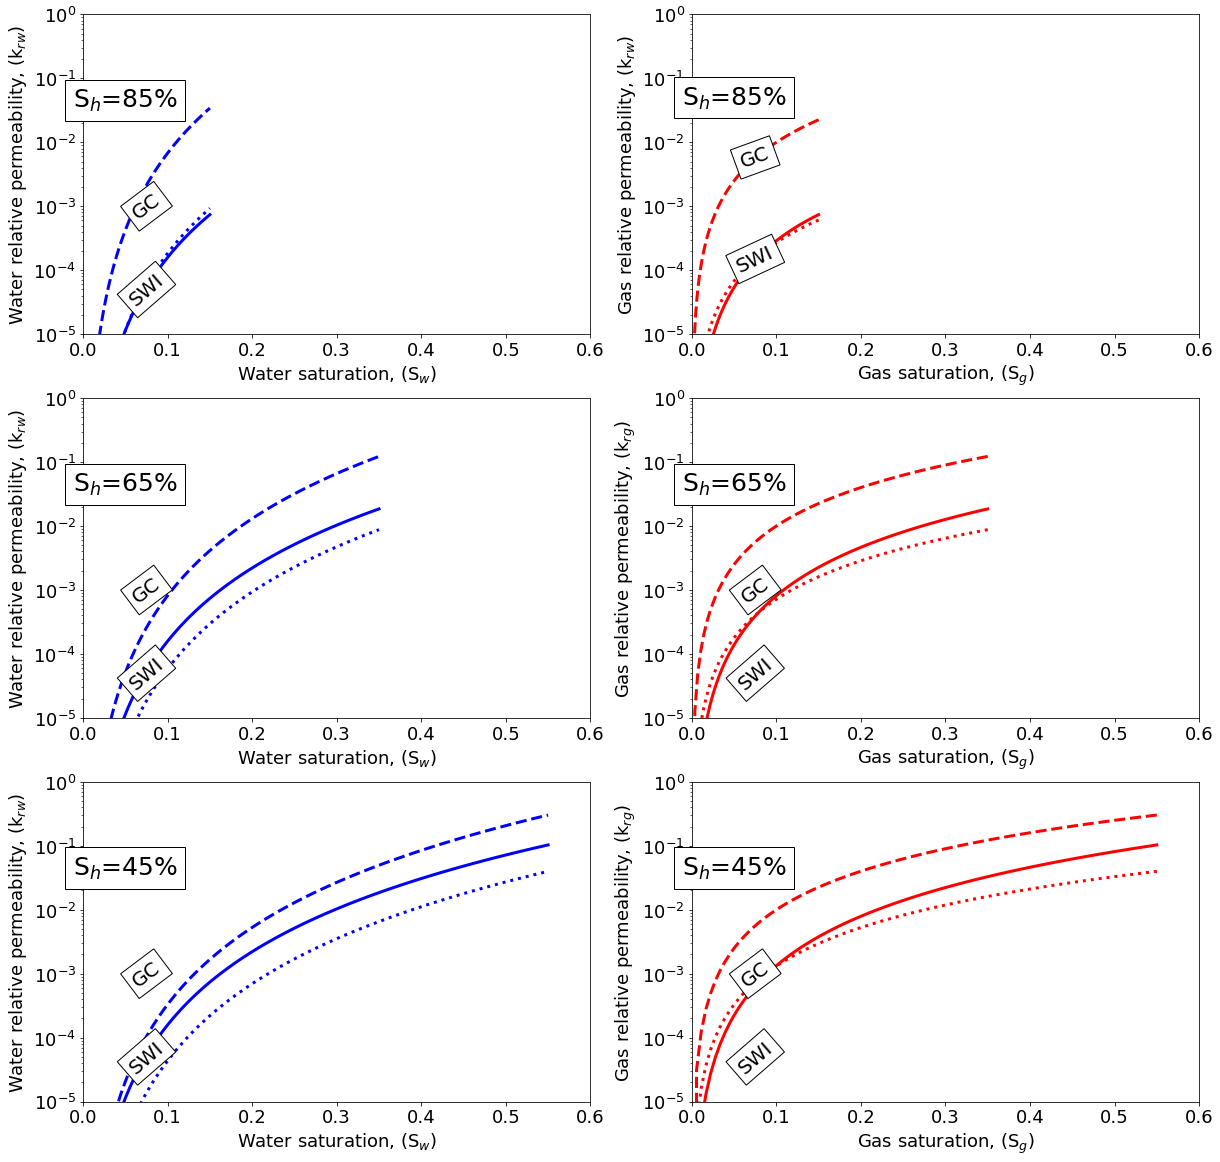

In [51]:
# plot pore filling/GC(Sh)

fig=plt.figure(figsize=(20,20))
plt.rcParams['font.size']=18
sharex='True'

plt1=fig.add_subplot(3,2,1)
plt1.semilogy(Sw,krw_swi,'-',linewidth=3,color='blue',label='SWI')
plt1.semilogy(Sw_solid,krw_pf,':',linewidth=3,color='blue',label='PF')
plt1.semilogy(Sw_solid,krw_gc,'--',linewidth=3,color='blue',label='GC')

plt1.annotate("S$_h$=85%",xy=(.05, .045), xycoords='data',
                 size=25, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"),)

plt1.annotate("SWI",xy=(.075, .00005), xycoords='data',
                 size=20, va="center", ha="center",rotation=41,
                bbox=dict(boxstyle="square", fc="w"),)

plt1.annotate("GC",xy=(.075, .001), xycoords='data',
                 size=20, va="center", ha="center",rotation=37,
                bbox=dict(boxstyle="square", fc="w"),)

plt.xlabel('Water saturation, (S$_w$)')
plt.xlim([0,.6])
#plt.xticks([0,.05,.1,.15,.2])
plt.ylim([0.00001,1])
plt.ylabel('Water relative permeability, (k$_{rw}$)')

plt2=fig.add_subplot(3,2,2)
plt2.semilogy(Sg,krg_swi,'-',linewidth=3,color='red',label='SWI')
plt2.semilogy(Sg_solid,krg_pf,':',linewidth=3,color='red',label='PF')
plt2.semilogy(Sg_solid,krg_gc,'--',linewidth=3,color='red',label='GC')

plt2.annotate("S$_h$=85%",xy=(.05, .05), xycoords='data',
                 size=25, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"),)

plt2.annotate("SWI",xy=(.075, .00015), xycoords='data',
                 size=20, va="center", ha="center",rotation=25,
                bbox=dict(boxstyle="square", fc="w"),)

plt2.annotate("GC",xy=(.075, .0058), xycoords='data',
                 size=20, va="center", ha="center",rotation=20,
                bbox=dict(boxstyle="square", fc="w"),)

plt.xlabel('Gas saturation, (S$_g$)')
plt.xlim([0,.6])
#plt.xticks([0,.05,.1,.15,.2])
plt.ylim([0.00001,1])
plt.ylabel('Gas relative permeability, (k$_{rw}$)')


plt3=fig.add_subplot(3,2,3)
plt3.semilogy(Sw2,krw_swi2,'-',linewidth=3,color='blue',label='SWI')
plt3.semilogy(Sw_solid2,krw_pf2,':',linewidth=3,color='blue',label='PF')
plt3.semilogy(Sw_solid2,krw_gc2,'--',linewidth=3,color='blue',label='GC')

plt3.annotate("S$_h$=65%",xy=(.05, .045), xycoords='data',
                 size=25, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"),)

plt3.annotate("SWI",xy=(.075, .00005), xycoords='data',
                 size=20, va="center", ha="center",rotation=41,
                bbox=dict(boxstyle="square", fc="w"),)

plt3.annotate("GC",xy=(.075, .001), xycoords='data',
                 size=20, va="center", ha="center",rotation=37,
                bbox=dict(boxstyle="square", fc="w"),)

plt.xlabel('Water saturation, (S$_w$)')
plt.xlim([0,.60])
#plt.xticks([0,.05,.1,.15,.2,.25,.3,.35,.4])
plt.ylim([0.00001,1])
plt.ylabel('Water relative permeability, (k$_{rw}$)')

plt4=fig.add_subplot(3,2,4)
plt4.semilogy(Sg2,krg_swi2,'-',linewidth=3,color='red',label='SWI')
plt4.semilogy(Sg_solid2,krg_pf2,':',linewidth=3,color='red',label='PF')
plt4.semilogy(Sg_solid2,krg_gc2,'--',linewidth=3,color='red',label='GC')

plt4.annotate("S$_h$=65%",xy=(.05, .045), xycoords='data',
                 size=25, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"),)

plt4.annotate("SWI",xy=(.075, .00005), xycoords='data',
                 size=20, va="center", ha="center",rotation=41,
                bbox=dict(boxstyle="square", fc="w"),)

plt4.annotate("GC",xy=(.075, .001), xycoords='data',
                 size=20, va="center", ha="center",rotation=37,
                bbox=dict(boxstyle="square", fc="w"),)

plt.xlabel('Gas saturation, (S$_g$)')
plt.xlim([0,.60])
#plt.xticks([0,.05,.1,.15,.2,.25,.3,.35,.4])
plt.ylim([0.00001,1])
plt.ylabel('Gas relative permeability, (k$_{rg}$)')

plt5=fig.add_subplot(3,2,5)
plt5.semilogy(Sw3,krw_swi3,'-',linewidth=3,color='blue',label='SWI')
plt5.semilogy(Sw_solid3,krw_pf3,':',linewidth=3,color='blue',label='PF')
plt5.semilogy(Sw_solid3,krw_gc3,'--',linewidth=3,color='blue',label='GC')

plt5.annotate("S$_h$=45%",xy=(.05, .045), xycoords='data',
                 size=25, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"),)

plt5.annotate("SWI",xy=(.075, .00005), xycoords='data',
                 size=20, va="center", ha="center",rotation=41,
                bbox=dict(boxstyle="square", fc="w"),)

plt5.annotate("GC",xy=(.075, .001), xycoords='data',
                 size=20, va="center", ha="center",rotation=37,
                bbox=dict(boxstyle="square", fc="w"),)

plt.xlabel('Water saturation, (S$_w$)')
plt.xlim([0,.60])
#plt.xticks([0,.05,.1,.15,.2,.25,.3,.35,.4])
plt.ylim([0.00001,1])
plt.ylabel('Water relative permeability, (k$_{rw}$)')

plt6=fig.add_subplot(3,2,6)
plt6.semilogy(Sg3,krg_swi3,'-',linewidth=3,color='red',label='SWI')
plt6.semilogy(Sg_solid3,krg_pf3,':',linewidth=3,color='red',label='PF')
plt6.semilogy(Sg_solid3,krg_gc3,'--',linewidth=3,color='red',label='GC')

plt6.annotate("S$_h$=45%",xy=(.05, .045), xycoords='data',
                 size=25, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"),)

plt6.annotate("SWI",xy=(.075, .00005), xycoords='data',
                 size=20, va="center", ha="center",rotation=41,
                bbox=dict(boxstyle="square", fc="w"),)

plt6.annotate("GC",xy=(.075, .001), xycoords='data',
                 size=20, va="center", ha="center",rotation=37,
                bbox=dict(boxstyle="square", fc="w"),)

plt.xlabel('Gas saturation, (S$_g$)')
plt.xlim([0,.6])
#plt.xticks([0,.05,.1,.15,.2,.25,.3,.35,.4])
plt.ylim([0.00001,1])
plt.ylabel('Gas relative permeability, (k$_{rg}$)')


Text(1, 0.95, 'D')

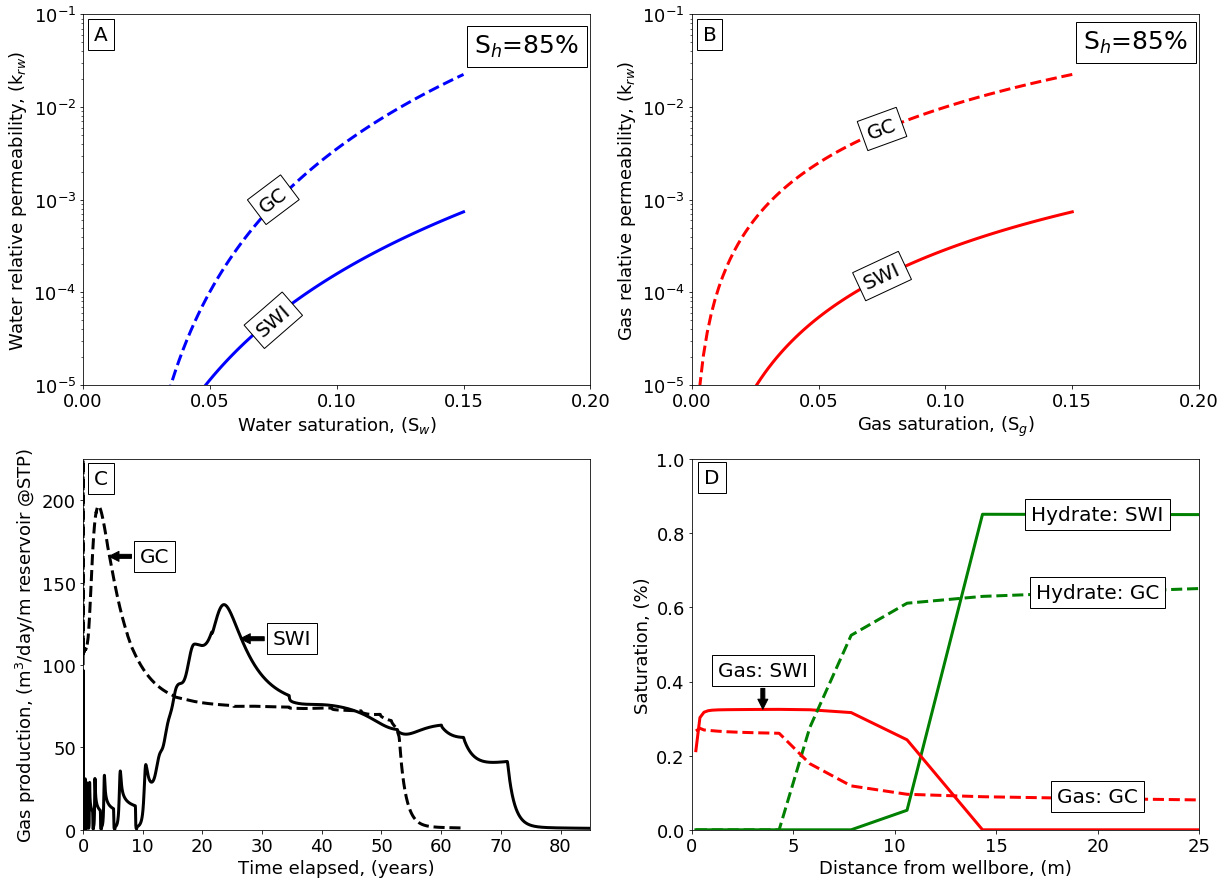

In [136]:
# plot pore filling/GC(Sh)

fig=plt.figure(figsize=(20,15))
plt.rcParams['font.size']=18
sharex='True'

plt1=fig.add_subplot(2,2,1)
plt1.semilogy(Sw,krw_swi,'-',linewidth=3,color='blue',label='SWI')
#plt1.semilogy(Sw_eff,krg_pf,':',linewidth=3,color='blue',label='PF')
plt1.semilogy(Sw_solid,krw_gc,'--',linewidth=3,color='blue',label='GC')

plt1.annotate("S$_h$=85%",xy=(.175, .045), xycoords='data',
                 size=25, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"),)

plt1.annotate("SWI",xy=(.075, .00005), xycoords='data',
                 size=20, va="center", ha="center",rotation=41,
                bbox=dict(boxstyle="square", fc="w"),)

plt1.annotate("GC",xy=(.075, .001), xycoords='data',
                 size=20, va="center", ha="center",rotation=37,
                bbox=dict(boxstyle="square", fc="w"),)

plt.xlabel('Water saturation, (S$_w$)')
plt.xlim([0,.2])
plt.xticks([0,.05,.1,.15,.2])
plt.ylim([0.00001,.1])
plt.ylabel('Water relative permeability, (k$_{rw}$)')

plt2=fig.add_subplot(2,2,2)
plt2.semilogy(Sg,krg_swi,'-',linewidth=3,color='red',label='SWI')
#plt2.semilogy(Sg_eff,krg_pf,':',linewidth=3,color='red',label='PF')
plt2.semilogy(Sg_solid,krg_gc,'--',linewidth=3,color='red',label='GC')

plt2.annotate("S$_h$=85%",xy=(.175, .05), xycoords='data',
                 size=25, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"),)

plt2.annotate("SWI",xy=(.075, .00015), xycoords='data',
                 size=20, va="center", ha="center",rotation=25,
                bbox=dict(boxstyle="square", fc="w"),)

plt2.annotate("GC",xy=(.075, .0058), xycoords='data',
                 size=20, va="center", ha="center",rotation=20,
                bbox=dict(boxstyle="square", fc="w"),)

plt.xlabel('Gas saturation, (S$_g$)')
plt.xlim([0,.2])
plt.xticks([0,.05,.1,.15,.2])
plt.ylim([0.00001,.1])
plt.ylabel('Gas relative permeability, (k$_{rw}$)')


plt3=fig.add_subplot(2,2,3)
plt3.plot(df2['Time_GC'],df2['rate_GC']/3,'--',linewidth=3,color='black',label='GC')
plt3.plot(df2['Time_SWI'],df2['rate_SWI']/3,linewidth=3,color='black',label='SWI')
plt.xlabel('Time elapsed, (years)')
plt.ylabel('Gas production, (m$^3$/day/m reservoir @STP)')

plt.xlim([0,85])
plt.ylim([0,225])
plt.yticks([0,50,100,150,200])

plt3.annotate("GC",xy=(4, 166), xycoords='data',
                 xytext=(12, 166), textcoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"),
                arrowprops=dict(arrowstyle="simple",fc="k"),)

plt3.annotate("SWI",xy=(26, 116), xycoords='data',
                 xytext=(35, 116), textcoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"),
                arrowprops=dict(arrowstyle="simple",fc="k"),)

plt4=fig.add_subplot(2,2,4)
plt4.plot(df['distance'],df['Sh_5ySWI'],linewidth=3,color='green',label='SWI: S$_h$')
plt4.plot(df['distance'],df['Sg_5ySWI'],linewidth=3,color='red',label='SWI: S$_g$')
plt4.plot(df['distance'],df['Sh_5yGC'],'--',linewidth=3,color='green',label='GC: S$_h$')
plt4.plot(df['distance'],df['Sg_5yGC'],'--',linewidth=3,color='red',label='GC: S$_g$')

#plt4.annotate("Saturation: 5 years",xy=(6.5, .92), xycoords='data',
                # size=25, va="center", ha="center",
                #bbox=dict(boxstyle="square", fc="w"),)

plt4.annotate("Hydrate: SWI",xy=(20, .85), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"),)

plt4.annotate("Hydrate: GC",xy=(20, .64), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"),)

plt4.annotate("Gas: SWI",xy=(3.5, .32), xycoords='data',
              xytext=(3.5, 0.43), textcoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"),
                arrowprops=dict(arrowstyle="simple",fc="k"),)


plt4.annotate("Gas: GC",xy=(20, .09), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"),)


plt.xlim([0,25])
plt.ylim([0,1])
plt.xlabel('Distance from wellbore, (m)')
plt.ylabel('Saturation, (%)')
#plt.legend()

plt1.annotate("A",xy=(.007,.06), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"))

plt2.annotate("B",xy=(.007,.06), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"))

plt3.annotate("C",xy=(3,213), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"))

plt4.annotate("D",xy=(1,.95), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"))


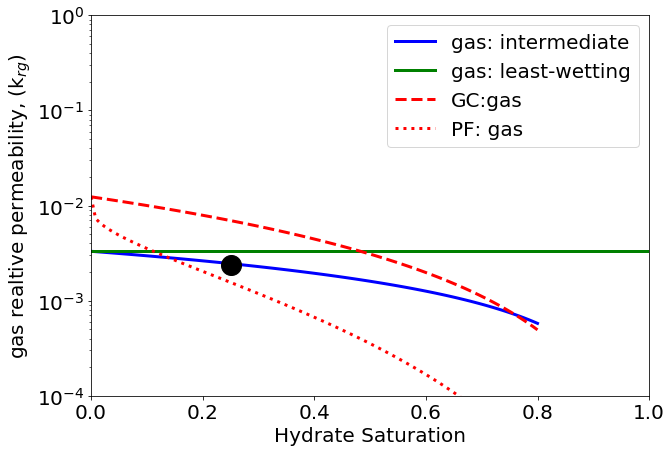

In [20]:
# plot pore filling/GC(Sh)

fig=plt.figure(figsize=(10,7))
plt.rcParams['font.size']=20
sharex='True'

plt1=fig.add_subplot(1,1,1)
#plt1.semilogy(Sh,krg,'-',linewidth=3,color='red',label='gas')
plt1.semilogy(Sh10,krg_swi10,'-',linewidth=3,color='blue',label='gas: intermediate')
plt.axhline(krgg,0,1,linewidth=3,color='green',label='gas: least-wetting')
plt1.semilogy(Sh10,krg_gc10,'--',linewidth=3,color='red',label='GC:gas')
plt1.semilogy(Sh10,krg_pf10,':',linewidth=3,color='red',label='PF: gas')

plt1.semilogy(Sh_exp,krg_exp,'o',markersize=20,color='black')

plt.xlabel('Hydrate Saturation')
plt.xlim([0,1])
plt.ylabel('gas realtive permeability, (k$_{rg}$)')
plt.ylim([0.0001,1])
plt.legend()

In [2]:
# SWI-10%
Sh10=np.linspace(0,.8,100)
nw=4;
ng=2;
Srw=.1;
Srg=0;

Sg=.1

for i in Sh10:
    Sw=1-Sh10-Sg
    krw_swi10=((Sw-Srw)/(1-Srw))**nw
    krg_swi10=((Sh10/(1-Sg))*((Sg-Srg)/(1-Srw))**ng)+((1-(Sh10/(1-Sg)))*((Sg-Srg)/(1-Srw))**nw)

In [3]:
# SWI-20%
Sh20=np.linspace(0,.7,100)
nw=4;
ng=2;
Srw=.1;
Srg=0;

Sg=.2

for i in Sh20:
    Sw=1-Sh20-Sg
    krw_swi20=((Sw-Srw)/(1-Srw))**nw
    krg_swi20=((Sh20/(1-Sg))*(((Sg-Srg)/(1-Srw))**ng))+((1-(Sh20/(1-Sg)))*((Sg-Srg)/(1-Srw))**nw)

In [4]:
# SWI-30%
Sh30=np.linspace(0,.6,100)
nw=4;
ng=2;
Srw=.1;
Srg=0;

Sg=.3

for i in Sh30:
    Sw=1-Sh30-Sg
    krw_swi30=((Sw-Srw)/(1-Srw))**nw
    krg_swi30=((Sh30/(1-Sg))*((Sg-Srg)/(1-Srw))**ng)+((1-(Sh30/(1-Sg)))*(((Sg-Srg)/(1-Srw))**nw))

C:\Users\zmurp\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


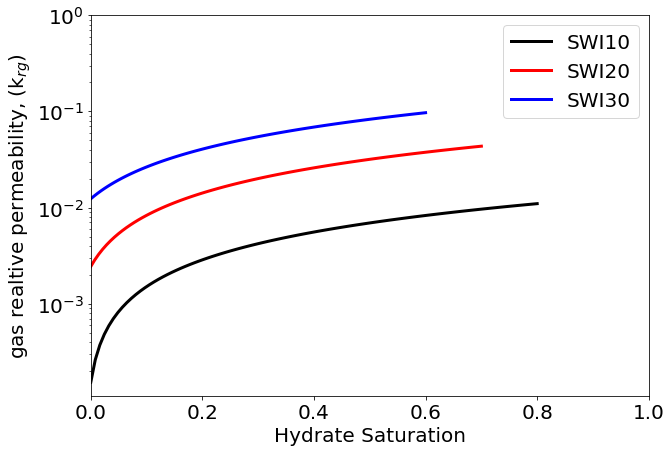

In [5]:
# plot pore filling/GC(Sh)

fig=plt.figure(figsize=(10,7))
plt.rcParams['font.size']=20
sharex='True'

plt1=fig.add_subplot(1,1,1)
plt1.semilogy(Sh10,krg_swi10,'-',linewidth=3,color='black',label='SWI10')
plt1.semilogy(Sh20,krg_swi20,'-',linewidth=3,color='red',label='SWI20')
plt1.semilogy(Sh30,krg_swi30,'-',linewidth=3,color='blue',label='SWI30')

plt.xlabel('Hydrate Saturation')
plt.xlim([0,1])
plt.ylabel('gas realtive permeability, (k$_{rg}$)')
plt.ylim([0,1])
plt.legend()

In [6]:
# SOLID MODEL (with hydrate) Sg=20%
Sh20=np.linspace(0,.7,100)
nw=4;
ng=2;
Srw=.1;
Srg=0;

Sw_eff=.8
Sg_eff=.2

for i in Sh20:
    krw_gc=(((Sw_eff-Srw)/(1-Srw))**nw)*(1-Sh20)**2
    krg_gc20=(((Sg_eff-Srg)/(1-Srw))**ng)*(1-Sh20)**2
    krw_pf=(((Sw_eff-Srw)/(1-Srw))**nw)*(1-Sh20**2+((2*((1-Sh20)**2))/(np.log(Sh20))))
    krg_pf20=(((Sg_eff-Srg)/(1-Srw))**ng)*(1-Sh20**2+((2*((1-Sh20)**2))/(np.log(Sh20))))

C:\Users\zmurp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\zmurp\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [7]:
# SOLID MODEL (with hydrate) Sg=10%
Sh10=np.linspace(0,.8,100)
nw=4;
ng=2;
Srw=.1;
Srg=0;

Sw_eff=.9
Sg_eff=.1

for i in Sh10:
    krw_gc=(((Sw_eff-Srw)/(1-Srw))**nw)*(1-Sh10)**2
    krg_gc10=(((Sg_eff-Srg)/(1-Srw))**ng)*(1-Sh10)**2
    krw_pf=(((Sw_eff-Srw)/(1-Srw))**nw)*(1-Sh10**2+((2*((1-Sh10)**2))/(np.log(Sh10))))
    krg_pf10=(((Sg_eff-Srg)/(1-Srw))**ng)*(1-Sh10**2+((2*((1-Sh10)**2))/(np.log(Sh10))))

C:\Users\zmurp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\zmurp\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [8]:
# SOLID MODEL (with hydrate) Sg=30%
Sh30=np.linspace(0,.6,100)
nw=4;
ng=2;
Srw=.1;
Srg=0;

Sw_eff=.7
Sg_eff=.3

for i in Sh30:
    krw_gc=(((Sw_eff-Srw)/(1-Srw))**nw)*(1-Sh30)**2
    krg_gc30=(((Sg_eff-Srg)/(1-Srw))**ng)*(1-Sh30)**2
    krw_pf=(((Sw_eff-Srw)/(1-Srw))**nw)*(1-Sh30**2+((2*((1-Sh30)**2))/(np.log(Sh30))))
    krg_pf30=(((Sg_eff-Srg)/(1-Srw))**ng)*(1-Sh30**2+((2*((1-Sh30)**2))/(np.log(Sh30))))

C:\Users\zmurp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\zmurp\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


Text(0.5, 0.08, 'Hydrate Saturation, (Sh)')

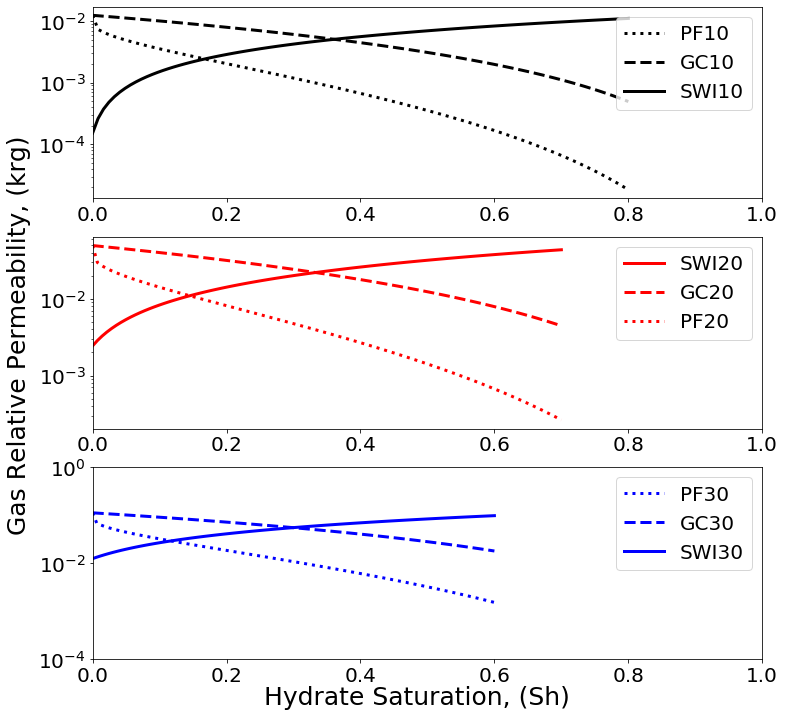

In [9]:
# plot pore filling/GC(Sh)

fig=plt.figure(figsize=(12,12))
plt.rcParams['font.size']=20
sharex='True'

plt1=fig.add_subplot(3,1,1)


plt1.semilogy(Sh10,krg_pf10,':',linewidth=3,color='black',label='PF10')
plt1.semilogy(Sh10,krg_gc10,'--',linewidth=3,color='black',label='GC10')
plt1.semilogy(Sh10,krg_swi10,'-',linewidth=3,color='black',label='SWI10')
plt.xlim([0,1])
plt.legend(loc='upper right')

plt2=fig.add_subplot(3,1,2)
plt2.semilogy(Sh20,krg_swi20,'-',linewidth=3,color='red',label='SWI20')
plt2.semilogy(Sh20,krg_gc20,'--',linewidth=3,color='red',label='GC20')
plt2.semilogy(Sh20,krg_pf20,':',linewidth=3,color='red',label='PF20')
plt.xlim([0,1])
plt.legend()
plt3=fig.add_subplot(3,1,3)
plt3.semilogy(Sh30,krg_pf30,':',linewidth=3,color='blue',label='PF30')
plt3.semilogy(Sh30,krg_gc30,'--',linewidth=3,color='blue',label='GC30')
plt3.semilogy(Sh30,krg_swi30,'-',linewidth=3,color='blue',label='SWI30')

plt.xlim([0,1])
plt.ylim([0.0001,1])
plt.legend()


fig.text(0.04, 0.5, 'Gas Relative Permeability, (krg)',fontsize=25, ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.08, 'Hydrate Saturation, (Sh)',fontsize=25, ha='center', va='center')